In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3.1 Problem - 1: Getting Started with Data Exploration - Some Warm up
Exercises:
1. Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.
• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.
• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.
• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.
• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Assignment_1/WHR-2024-5CS037.csv')  # Replace 'your_dataset_file.csv' with the actual file path

# Dataset Overview
# 1. Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

# 2. Identify the number of rows and columns
num_rows, num_cols = data.shape
print(f"\nThe dataset has {num_rows} rows and {num_cols} columns.")

# 3. List all columns and their data types
print("\nColumns and their data types:")
print(data.dtypes)

# Basic Statistics
# 1. Calculate the mean, median, and standard deviation for the Score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_score = data['score'].std()

print(f"\nBasic Statistics for the 'score' column:")
print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Standard Deviation: {std_score}")

# 2. Identify the country with the highest and lowest happiness scores
max_score_row = data.loc[data['score'].idxmax()]
min_score_row = data.loc[data['score'].idxmin()]

print(f"\nCountry with the highest happiness score: {max_score_row['Country name']} ({max_score_row['score']})")
print(f"Country with the lowest happiness score: {min_score_row['Country name']} ({min_score_row['score']})")

# Filtering
filtered_data = data[data['score'] > 7.5]

print(f"\nCountries with a Score greater than 7.5: {len(filtered_data)} rows")

# 2. Sort the filtered dataset by Log GDP per capita in descending order and display top 10 rows
sorted_filtered_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("\nTop 10 rows of the filtered dataset sorted by Log GDP per capita:")
print(sorted_filtered_data)


# Adding New Columns
# 1. Create a new column "Happiness Category" based on the Score
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("\nAdded 'Happiness Category' column:")
print(data[['Country name', 'score', 'Happiness Category']].head(10))


First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

2. Data Visualizations:
• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.


<ipython-input-46-a685ecad1b87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='score', x='Country name', data=top_10_happiest, palette='viridis')


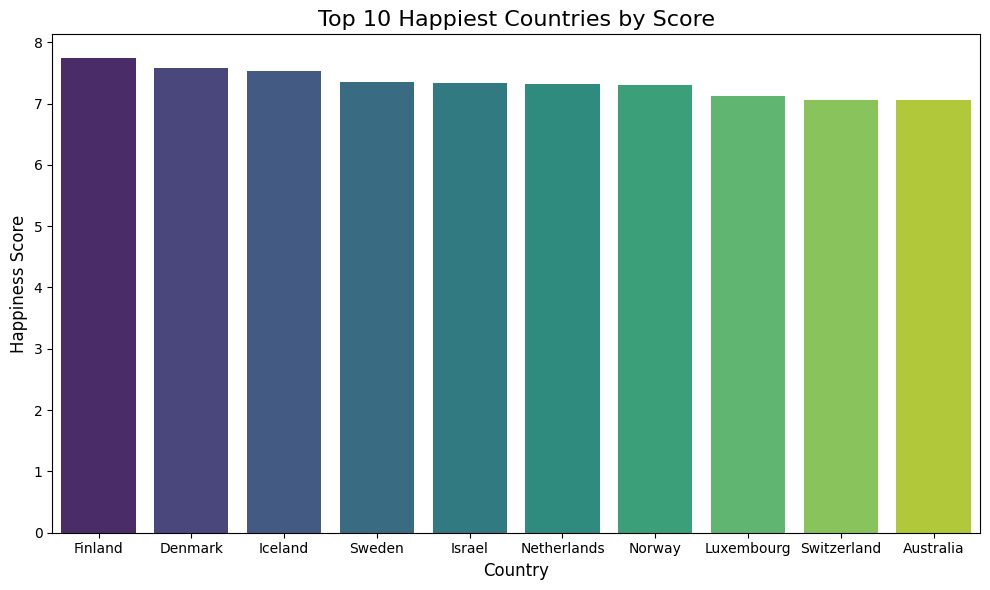

In [ ]:
# 1. Bar Plot: Top 10 Happiest Countries by Score
top_10_happiest = data.nlargest(10, 'score')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='score', x='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by Score', fontsize=16)
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

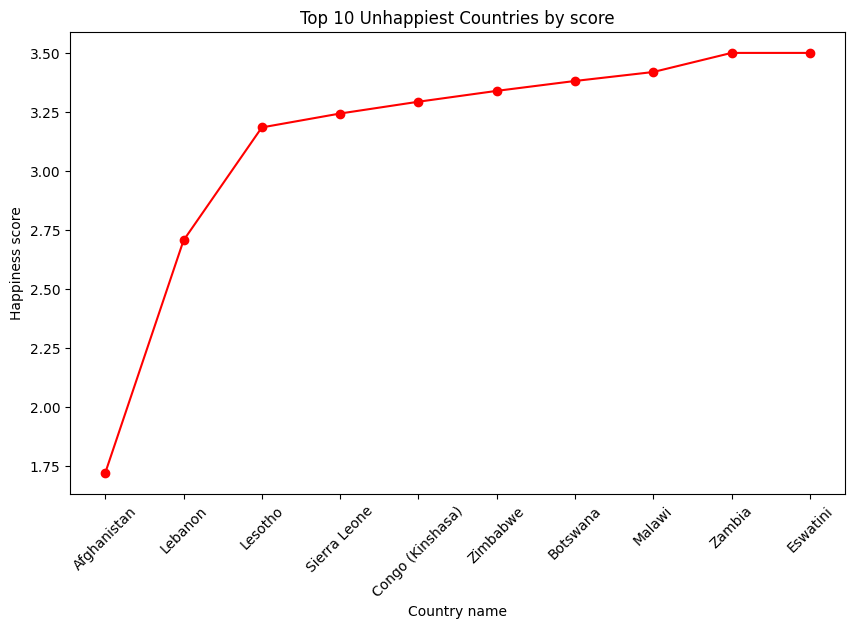

In [ ]:
# 2. Line Plot: Top 10 Unhappiest Countries by Score
bottom_10_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(bottom_10_unhappiest['Country name'], bottom_10_unhappiest['score'], marker='o', linestyle='-', color='red')
plt.title('Top 10 Unhappiest Countries by score')
plt.xlabel('Country name')
plt.ylabel('Happiness score')
plt.xticks(rotation=45)
plt.show()

[link text](https://)• Plot a histogram for the Score column to show its distribution and also interpret.

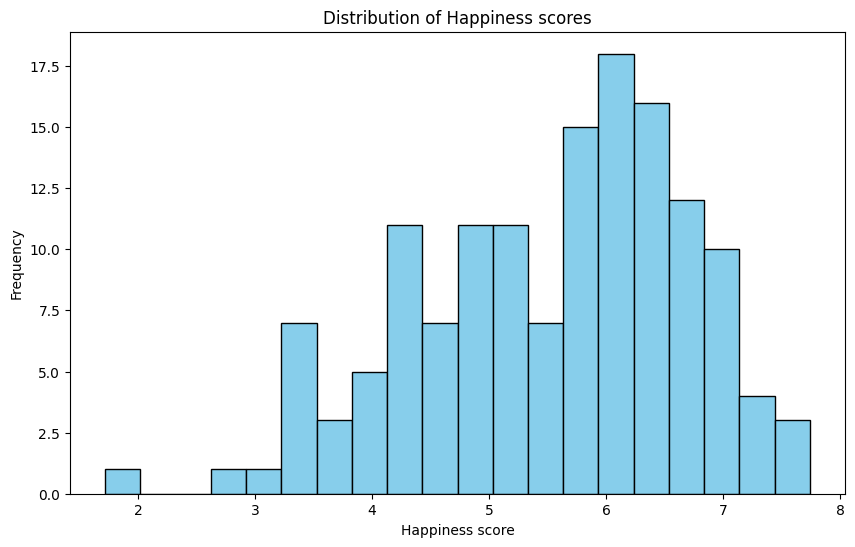

In [ ]:
# 3. Histogram: Distribution of Scores
plt.figure(figsize=(10, 6))
plt.hist(data['score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness scores')
plt.xlabel('Happiness score')
plt.ylabel('Frequency')
plt.show()

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

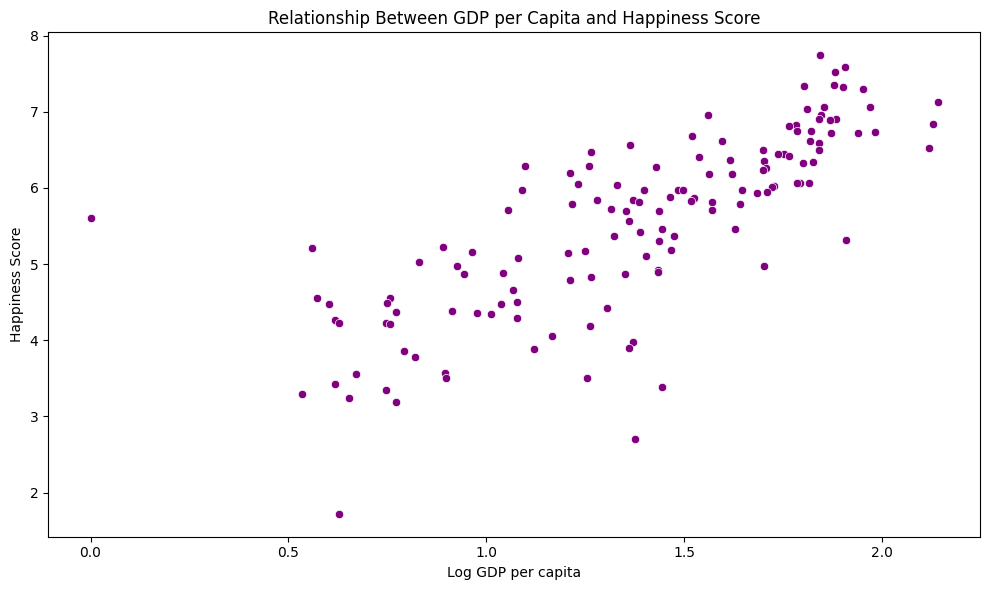

In [ ]:
# 4. Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, color='purple')
plt.title('Relationship Between GDP per Capita and Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:
Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",

"Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
import pandas as pd

# Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Assuming `data` is your original DataFrame with a 'Country name' column
# Filter the dataset to include only South Asian countries
south_asian_data = data[data['Country name'].isin(south_asian_countries)]

# Save the filtered dataset to a new CSV file
south_asian_data.to_csv('south_asian_countries_data.csv', index=False)

# Optionally, check the first few rows of the filtered data
print(south_asian_data.head())


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115                1.783             Medium  
107                      0.074

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support

+ 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

<ipython-input-37-ade64fff5bd4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_data['Composite Score'] = (0.40 * south_asian_data['Log GDP per capita'] +
<ipython-input-37-ade64fff5bd4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_south_asian, palette='viridis')


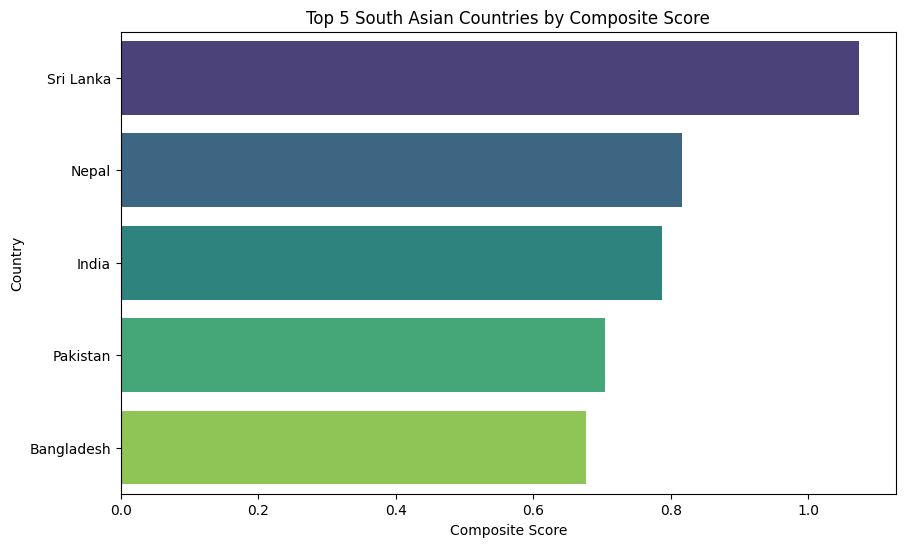

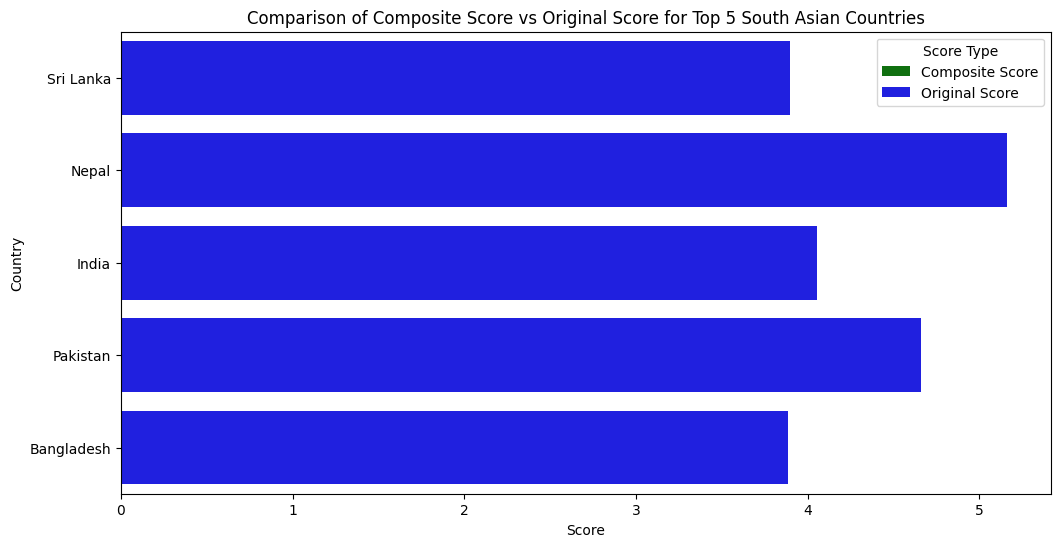

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `south_asian_data` is already filtered and available from Task-1

# 1. Create the Composite Score column
south_asian_data['Composite Score'] = (0.40 * south_asian_data['Log GDP per capita'] +
                                        0.30 * south_asian_data['Social support'] +
                                        0.30 * south_asian_data['Healthy life expectancy'])

# 2. Rank the South Asian countries based on Composite Score
south_asian_data_sorted = south_asian_data.sort_values(by='Composite Score', ascending=False)

# 3. Visualize the top 5 countries based on Composite Score
top_5_south_asian = south_asian_data_sorted.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_south_asian, palette='viridis')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

# 4. Compare rankings with original Score
south_asian_data_sorted_by_score = south_asian_data.sort_values(by='score', ascending=False)
top_5_composite = south_asian_data_sorted.head(5)
top_5_score = south_asian_data_sorted_by_score.head(5)

plt.figure(figsize=(12, 6))

# Plot Composite Score
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, color='green', label='Composite Score')

# Plot Original Score
sns.barplot(x='score', y='Country name', data=top_5_score, color='blue', label='Original Score')

plt.title('Comparison of Composite Score vs Original Score for Top 5 South Asian Countries')
plt.xlabel('Score')
plt.ylabel('Country')
plt.legend(title='Score Type')
plt.show()


Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

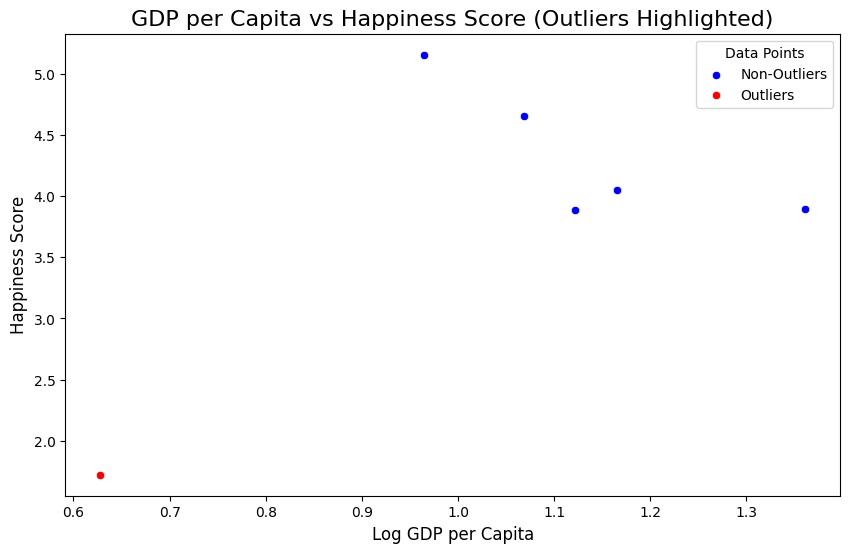


Outlier countries based on Score or GDP per Capita:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


In [ ]:
# Assuming 'south_asian_data' contains the South Asia dataset and is ready

# Step 1: Calculate Q1, Q3, and IQR for Score and GDP per Capita
Q1_score = south_asian_data['score'].quantile(0.25)
Q3_score = south_asian_data['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Step 2: Define outliers using the 1.5 * IQR rule
outlier_condition_score = (south_asian_data['score'] < (Q1_score - 1.5 * IQR_score)) | (south_asian_data['score'] > (Q3_score + 1.5 * IQR_score))
outlier_condition_gdp = (south_asian_data['Log GDP per capita'] < (Q1_gdp - 1.5 * IQR_gdp)) | (south_asian_data['Log GDP per capita'] > (Q3_gdp + 1.5 * IQR_gdp))

# Step 3: Combine outlier conditions
outliers = south_asian_data[outlier_condition_score | outlier_condition_gdp]

# Step 4: Create a scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, label='Non-Outliers', color='blue')

# Highlight outliers in red
sns.scatterplot(x=outliers['Log GDP per capita'], y=outliers['score'], label='Outliers', color='red')

# Titles and labels
plt.title('GDP per Capita vs Happiness Score (Outliers Highlighted)', fontsize=16)
plt.xlabel('Log GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Data Points')

plt.show()

# Step 5: Discuss the characteristics of the outliers
print("\nOutlier countries based on Score or GDP per Capita:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])


Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

Pearson correlation between Freedom to Make Life Choices and Score: 0.8005185224163316
Pearson correlation between Generosity and Score: 0.874512371253192


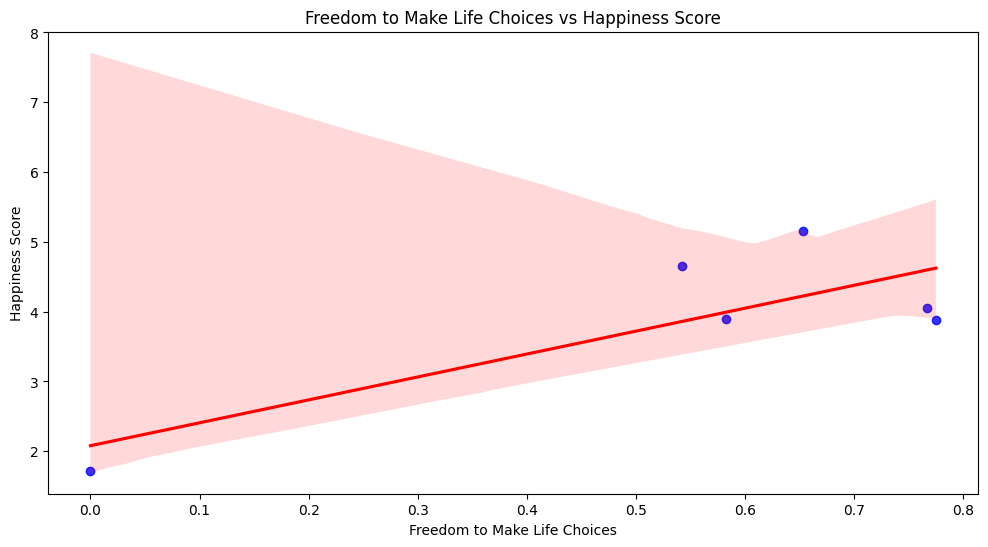

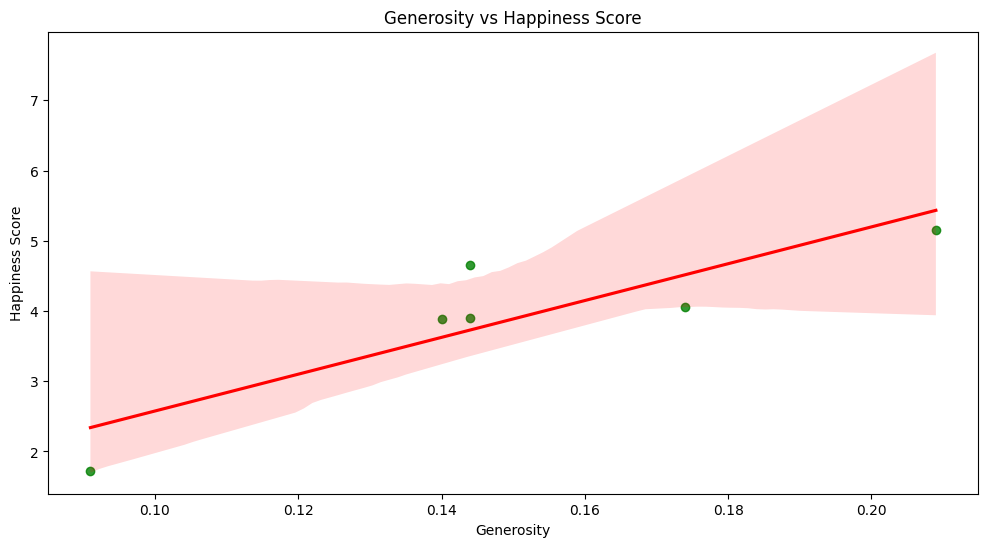


The strongest relationship is between 'Generosity' and 'Score'.
The strongest relationship is with 'Generosity' with a correlation of 0.87.


In [ ]:
!pip install scipy
import scipy.stats # Add this line to import the scipy.stats module

# Assuming south_asian_data contains the South Asia dataset

# Step 1: Calculate the Pearson correlation between chosen metrics and Score
corr_freedom, _ = scipy.stats.pearsonr(south_asian_data['Freedom to make life choices'], south_asian_data['score'])
corr_generosity, _ = scipy.stats.pearsonr(south_asian_data['Generosity'], south_asian_data['score'])

print(f"Pearson correlation between Freedom to Make Life Choices and Score: {corr_freedom}")
print(f"Pearson correlation between Generosity and Score: {corr_generosity}")

# Step 2: Create scatter plots with trendlines for these metrics against the Score

# Scatter plot for Freedom to Make Life Choices vs Score
plt.figure(figsize=(12, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

# Scatter plot for Generosity vs Score
plt.figure(figsize=(12, 6))
sns.regplot(x='Generosity', y='score', data=south_asian_data, scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

# Step 3: Discussion of relationships
if corr_freedom > corr_generosity:
    print("\nThe strongest relationship is between 'Freedom to Make Life Choices' and 'Score'.")
else:
    print("\nThe strongest relationship is between 'Generosity' and 'Score'.")

if abs(corr_freedom) > abs(corr_generosity):
    print(f"The strongest relationship is with 'Freedom to Make Life Choices' with a correlation of {corr_freedom:.2f}.")
else:
    print(f"The strongest relationship is with 'Generosity' with a correlation of {corr_generosity:.2f}.")

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Index(['Country name', 'score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual',
       'Happiness Category'],
      dtype='object')

South Asian countries ranked by GDP-Score Gap (ascending):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

South Asian countries ranked by GDP-Score Gap (descending):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


<ipython-input-12-9dbf846dc086>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']


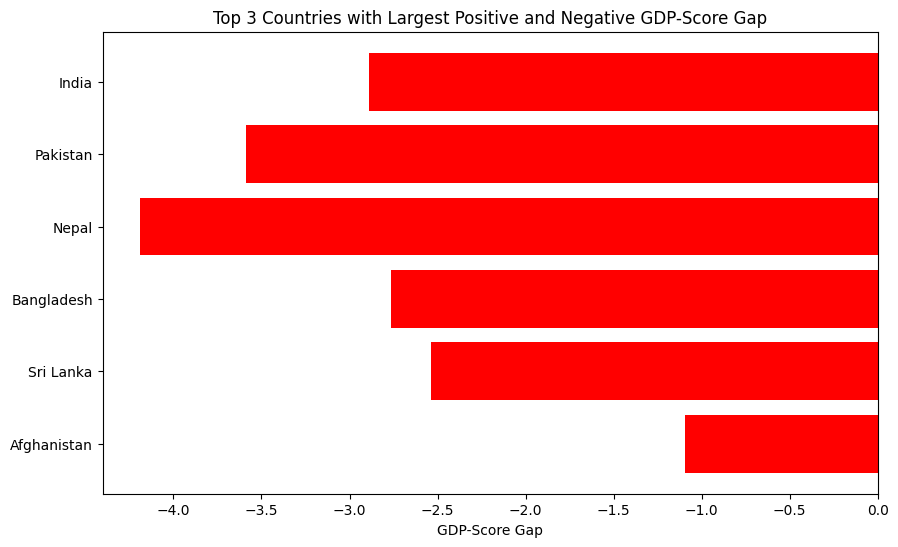

In [ ]:
import pandas as pd

# Sample code to load the dataset
# Make sure you load your dataset here
# south_asian_data = pd.read_csv("path_to_your_south_asian_data.csv")

# Step 1: Check the column names to identify the correct name for GDP per Capita
print(south_asian_data.columns)

# Step 2: Assuming 'GDP_Per_Capita' is the correct name for GDP per Capita (change this to the correct one if necessary)
# Add a new column 'GDP-Score Gap' (difference between GDP per Capita and Score)
south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']

# Step 3: Rank the countries by GDP-Score Gap in both ascending and descending order
ascending_gap = south_asian_data.sort_values('GDP-Score Gap', ascending=True)
descending_gap = south_asian_data.sort_values('GDP-Score Gap', ascending=False)

# Step 4: Display the results for ascending and descending GDP-Score Gap
print("\nSouth Asian countries ranked by GDP-Score Gap (ascending):")
print(ascending_gap[['Country name', 'GDP-Score Gap']])

print("\nSouth Asian countries ranked by GDP-Score Gap (descending):")
print(descending_gap[['Country name', 'GDP-Score Gap']])

# Step 5: Visualize the top 3 countries with the largest positive and negative GDP-Score Gap using a bar chart
import matplotlib.pyplot as plt


# Get the top 3 positive and negative GDP-Score gaps
top_3_positive_gap = descending_gap[['Country name', 'GDP-Score Gap']].head(3)  # Changed 'Country' to 'Country name'
top_3_negative_gap = ascending_gap[['Country name', 'GDP-Score Gap']].head(3)


# Combine the top 3 positive and negative gaps into one DataFrame
gap_data = pd.concat([top_3_positive_gap, top_3_negative_gap])

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(gap_data['Country name'], gap_data['GDP-Score Gap'], color=['green' if gap >= 0 else 'red' for gap in gap_data['GDP-Score Gap']]) # Changed 'Country' to 'Country name'
plt.xlabel('GDP-Score Gap')
plt.title('Top 3 Countries with Largest Positive and Negative GDP-Score Gap')
plt.show()



3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",

"United Arab Emirates", "Yemen"]

In [ ]:
# List of Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
# Changed 'Country' to 'Country name'
middle_east_data = data[data['Country name'].isin(middle_east_countries)]

# Display the first few rows of the filtered dataset
print(middle_east_data.head())

# Save the filtered data to a CSV file for future use
middle_east_data.to_csv("middle_east_data.csv", index=False)


            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual Happiness Category  
4                       0.193                2.298            

1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?

In [ ]:
# Calculate mean and standard deviation for South Asia
south_asian_mean = south_asian_data['score'].mean()
south_asian_std = south_asian_data['score'].std()

# Calculate mean and standard deviation for the Middle East
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

# Display the results
print(f"South Asia - Mean: {south_asian_mean}, Standard Deviation: {south_asian_std}")
print(f"Middle East - Mean: {middle_east_mean}, Standard Deviation: {middle_east_std}")

# Determine which region has higher average happiness score
if south_asian_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")


South Asia - Mean: 3.895666666666667, Standard Deviation: 1.1770690152521504
Middle East - Mean: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has a higher average happiness score.


2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.

In [ ]:
# Identify top 3 and bottom 3 countries based on score for each region
print("\nTop and Bottom Performers:")

print("Top 3 South Asian Countries:")
print(south_asian_data.nlargest(3, 'score')[['Country name', 'score']])

print("\nBottom 3 South Asian Countries:")
print(south_asian_data.nsmallest(3, 'score')[['Country name', 'score']])

print("\nTop 3 Middle Eastern Countries:")
print(middle_east_data.nlargest(3, 'score')[['Country name', 'score']])

print("\nBottom 3 Middle Eastern Countries:")
print(middle_east_data.nsmallest(3, 'score')[['Country name', 'score']])



Top and Bottom Performers:
Top 3 South Asian Countries:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 South Asian Countries:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 Middle Eastern Countries:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle Eastern Countries:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?

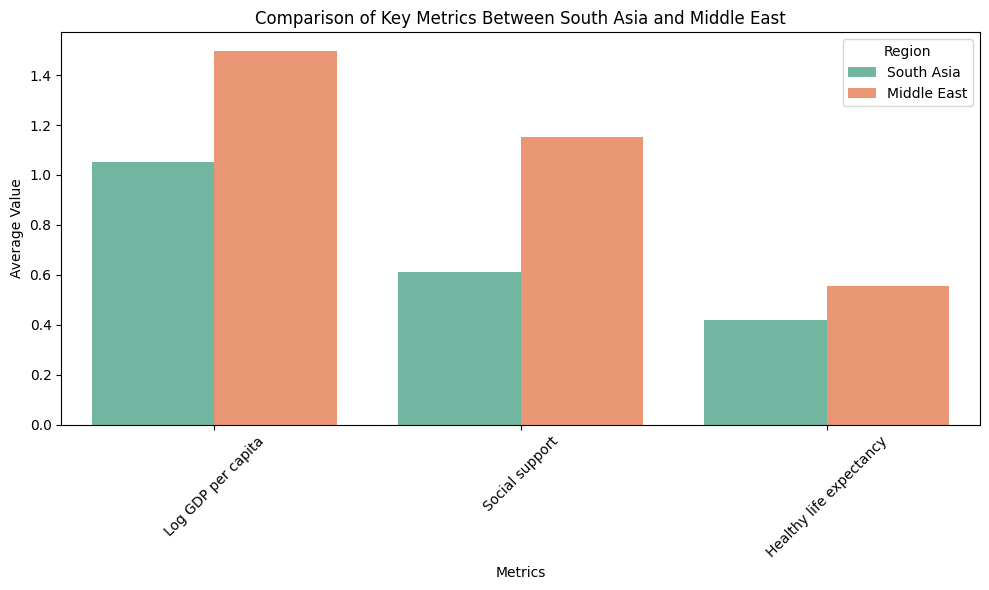

In [ ]:
# Selecting key metrics for comparison
# Correct the column names to match the dataset
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Aggregating the mean of each metric by region
south_asian_metrics = south_asian_data[metrics].mean().reset_index(name='Value')
south_asian_metrics['Region'] = 'South Asia'

middle_east_metrics = middle_east_data[metrics].mean().reset_index(name='Value')
middle_east_metrics['Region'] = 'Middle East'

# Combining the data for both regions
comparison_df = pd.concat([south_asian_metrics, middle_east_metrics])

# Plotting grouped bar charts
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Region', data=comparison_df, palette='Set2')

# Adding labels and title
plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?

In [ ]:
# 4. Happiness Disparity:
# Compute range and coefficient of variation (CV) for Score
def compute_stats(df, region_name):
    score_range = df['score'].max() - df['score'].min()
    score_cv = (df['score'].std() / df['score'].mean()) * 100
    print(f"\n{region_name} Happiness Score Range: {score_range:.2f}")
    print(f"{region_name} Happiness Score Coefficient of Variation: {score_cv:.2f}%")

compute_stats(south_asian_data, "South Asia")
compute_stats(middle_east_data, "Middle East")



South Asia Happiness Score Range: 3.44
South Asia Happiness Score Coefficient of Variation: 30.21%

Middle East Happiness Score Range: 4.63
Middle East Happiness Score Coefficient of Variation: 28.94%


5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.


Correlation Analysis:
Correlation of Score with Freedom to make life choices in South Asia: 0.80
Correlation of Score with Freedom to make life choices in Middle East: 0.86
Correlation of Score with Generosity in South Asia: 0.87
Correlation of Score with Generosity in Middle East: 0.63


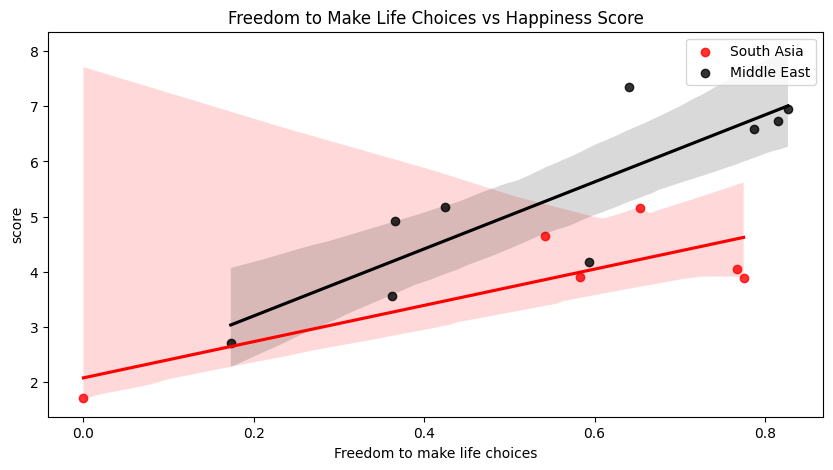

In [ ]:
# 5. Correlation Analysis:
# Correlation of Score with Freedom and Generosity
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']

print("\nCorrelation Analysis:")
for metric in metrics_to_correlate:
    south_corr = south_asian_data['score'].corr(south_asian_data[metric])
    middle_corr = middle_east_data['score'].corr(middle_east_data[metric])
    print(f"Correlation of Score with {metric} in South Asia: {south_corr:.2f}")
    print(f"Correlation of Score with {metric} in Middle East: {middle_corr:.2f}")

# Scatter plot for correlation visualization
plt.figure(figsize=(10, 5))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_data, label='South Asia', color='red')
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_data, label='Middle East', color='black')
plt.title("Freedom to Make Life Choices vs Happiness Score")
plt.legend()
plt.show()


6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.

In [ ]:
# 6. Outlier Detection:
# Detect outliers in Score and GDP per Capita using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_south = detect_outliers(south_asian_data, 'score')
outliers_middle = detect_outliers(middle_east_data, 'score')

print("\nOutliers in South Asia based on Score:")
print(outliers_south[['Country name', 'score']])

print("\nOutliers in Middle East based on Score:")
print(outliers_middle[['Country name', 'score']])



Outliers in South Asia based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []


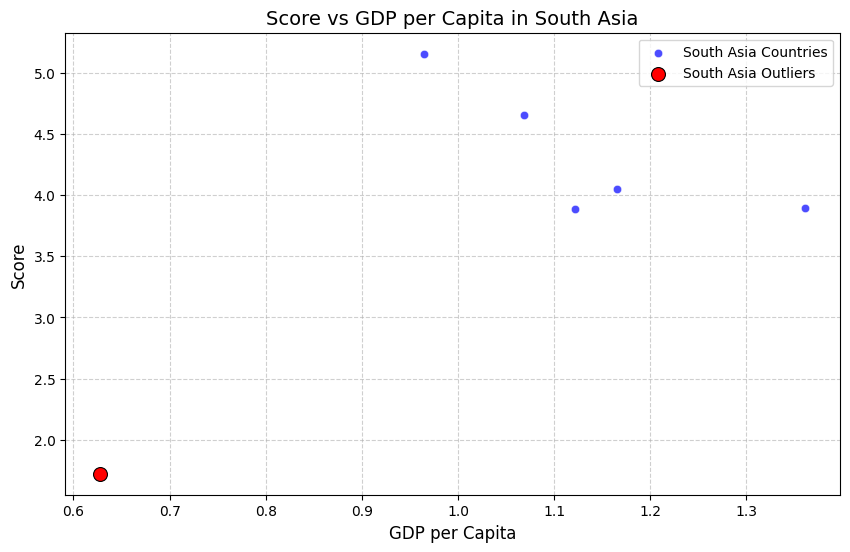

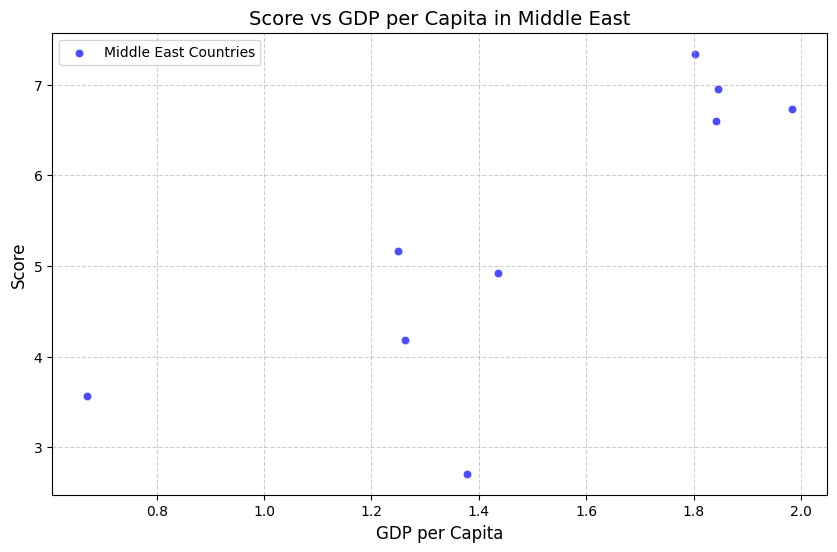

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Score vs GDP per Capita
def plot_outliers(region_data, outliers_data, region_name):
    plt.figure(figsize=(10, 6))

    # Scatter plot for all data points in the region
    # Changed 'GDP per Capita' to 'Log GDP per capita'
    sns.scatterplot(
        data=region_data,
        x='Log GDP per capita',
        y='score',
        color='blue',
        label=f'{region_name} Countries',
        alpha=0.7
    )

    # Highlight the outliers
    # Changed 'GDP per Capita' to 'Log GDP per capita'
    sns.scatterplot(
        data=outliers_data,
        x='Log GDP per capita',
        y='score',
        color='red',
        label=f'{region_name} Outliers',
        s=100,
        edgecolor='black'
    )

    # Add labels and title
    plt.title(f'Score vs GDP per Capita in {region_name}', fontsize=14)
    plt.xlabel('GDP per Capita', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Plotting South Asia
plot_outliers(south_asian_data, outliers_south, 'South Asia')

# Plotting Middle East
plot_outliers(middle_east_data, outliers_middle, 'Middle East')


7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

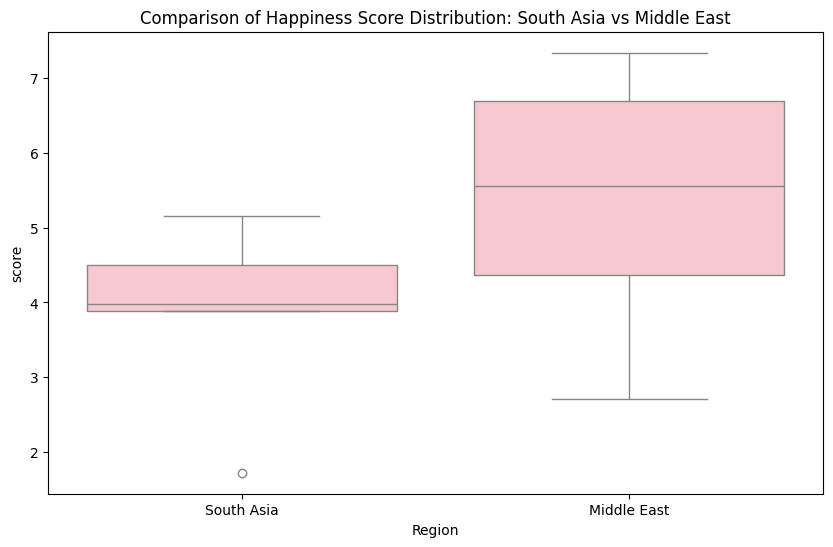

In [ ]:
# 7. Visualization: Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', color='pink', data=pd.concat([
    south_asian_data.assign(Region='South Asia'),
    middle_east_data.assign(Region='Middle East')
]))
plt.title("Comparison of Happiness Score Distribution: South Asia vs Middle East")
plt.show()